In [1]:
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (6, 4),
         'axes.labelsize': 'xx-large',
         'axes.titlesize': 'xx-large',
         'xtick.labelsize': 'x-large',
         'ytick.labelsize': 'x-large',
         'figure.facecolor': 'w'}
pylab.rcParams.update(params)
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

import h5py
import numpy as np
import os
import sys

sys.path.insert(1, '../code')
from geometric_features import GeometricFeaturizer
from scalar_features import ScalarFeaturizer
from read_halos import SimulationReader
import plotter
import scalars

%load_ext autoreload
%autoreload 2

In [2]:
# sim / halo info
base_dir = '/scratch/ksf293/equivariant-cosmology/data'
snap_num_str = '099' # z = 0
sim_name = 'TNG100-1'
sim_name_dark = 'TNG100-1-Dark'
# sim_name = 'TNG50-4'
# sim_name_dark = 'TNG50-4-Dark'
halo_dir = f'../data/halos/halos_{sim_name}'
halo_tag = '_nstarpartmin1'
fn_dark_halo_arr = f'{halo_dir}/halos_{sim_name}{halo_tag}.npy'

mass_multiplier = 1e10

In [3]:
# geo feature info info
geo_dir = f'../data/geometric_features/geometric_features_{sim_name}'
geo_tag = ''
fn_geo_features = f'{geo_dir}/geometric_features{halo_tag}{geo_tag}.npy'

In [4]:
# Go!
geo_featurizer = GeometricFeaturizer()
geo_featurizer.load_features(fn_geo_features)

In [5]:
sim_reader = SimulationReader(base_dir, sim_name, sim_name_dark, snap_num_str)
sim_reader.load_dark_halo_arr(fn_dark_halo_arr)
sim_reader.read_simulations()
sim_reader.add_catalog_property_to_halos('mass_hydro_subhalo_star')

In [6]:
m_stellar = np.array([dark_halo.catalog_properties['mass_hydro_subhalo_star'] for dark_halo in sim_reader.dark_halo_arr])

In [7]:
def plot_geometric_feature_vs_mass(masses, geo_featurizer, i_feat, feat_label=None, 
                         log_y=True, x_label=None):
    
        
    fig = plt.figure(figsize=(4,3))
    idx_notnone = [i for i in range(len(geo_featurizer.geo_feature_arr)) if geo_featurizer.geo_feature_arr[i] is not None]
    geo_feats = np.array([geo_arr[i_feat] for geo_arr in geo_featurizer.geo_feature_arr[idx_notnone]])
    masses = masses[idx_notnone]
    geo_feats_val = np.array([geo_feat.value for geo_feat in geo_feats])
    while len(geo_feats_val.shape) > 1:
        geo_feats_val = np.linalg.norm(geo_feats_val, axis=-1)
    #print(geo_feats_val.shape)

    if feat_label is None:
        feat_label = f'{geo_feats[0].to_string()}'
        
    #print(len(masses), len(geo_feats_val))
    plt.scatter(masses, geo_feats_val, color='k', s=6, alpha=0.2)
    plt.xscale('log')
    plt.yscale('log')
    xlim = np.min(masses), np.max(masses)
    plt.xlim(xlim)
    if log_y:
        ylim = np.min(geo_feats_val[geo_feats_val>0]), np.max(geo_feats_val[geo_feats_val>0])
        plt.ylim(ylim)
        feat_label = f'log({feat_label})'
    
    plt.xlabel(x_label)
    plt.ylabel(feat_label)

In [8]:
def plot_scalar_feature_vs_mass(masses, scalar_featurizer, i_feat, feat_label=None, 
                         log_y=True, x_label=None):
    
        
    fig = plt.figure(figsize=(4,3))
    scalar_feats = np.array([scalar_arr[i_feat] for scalar_arr in scalar_featurizer.scalar_feature_arr])
    scalar_feats_val = np.array([s.value for s in scalar_feats])

    if feat_label is None:
        feat_label = f'{scalar_feats[0].to_string()}'
        
    #print(len(masses), len(geo_feats_val))
    plt.scatter(masses, scalar_feats_val, color='k', s=6, alpha=0.2)
    plt.xscale('log')
    xlim = np.min(masses), np.max(masses)
    plt.xlim(xlim)
    if log_y:
        ylim = np.min(scalar_feats_val[scalar_feats_val>0]), np.max(scalar_feats_val[scalar_feats_val>0])
        plt.ylim(ylim)
        feat_label = f'log({feat_label})'
        plt.yscale('log')
    
    plt.xlabel(x_label)
    plt.ylabel(feat_label)

In [9]:
geo0 = geo_featurizer.geo_feature_arr[0]
print(geo0.shape)

(48,)


In [10]:
for g in geo0:
    print(g.to_string(), g.value.shape, g.hermitian)

g_000 () True
g_001 () True
g_002 () True
g_003 () True
g_004 () True
g_005 () True
g_006 () True
g_007 () True
g_010 (3,) True
g_011 (3,) True
g_012 (3,) True
g_013 (3,) True
g_014 (3,) True
g_015 (3,) True
g_016 (3,) True
g_017 (3,) True
g_020 (3, 3) True
g_021 (3, 3) True
g_022 (3, 3) True
g_023 (3, 3) True
g_024 (3, 3) True
g_025 (3, 3) True
g_026 (3, 3) True
g_027 (3, 3) True
g_100 (3,) True
g_101 (3,) True
g_102 (3,) True
g_103 (3,) True
g_104 (3,) True
g_105 (3,) True
g_106 (3,) True
g_107 (3,) True
g_110 (3, 3) False
g_111 (3, 3) False
g_112 (3, 3) False
g_113 (3, 3) False
g_114 (3, 3) False
g_115 (3, 3) False
g_116 (3, 3) False
g_117 (3, 3) False
g_200 (3, 3) True
g_201 (3, 3) True
g_202 (3, 3) True
g_203 (3, 3) True
g_204 (3, 3) True
g_205 (3, 3) True
g_206 (3, 3) True
g_207 (3, 3) True


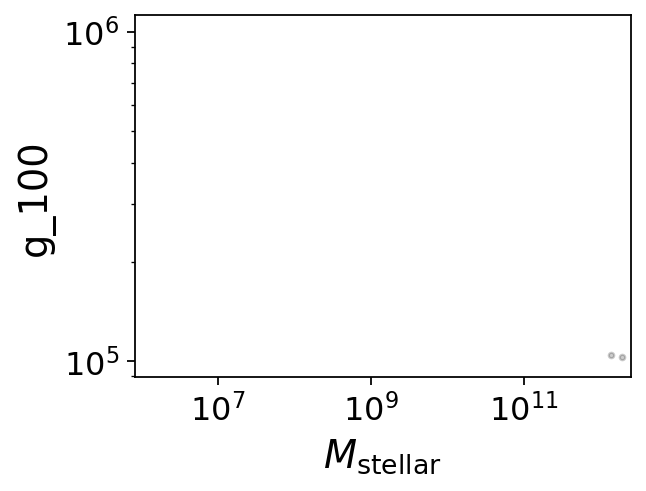

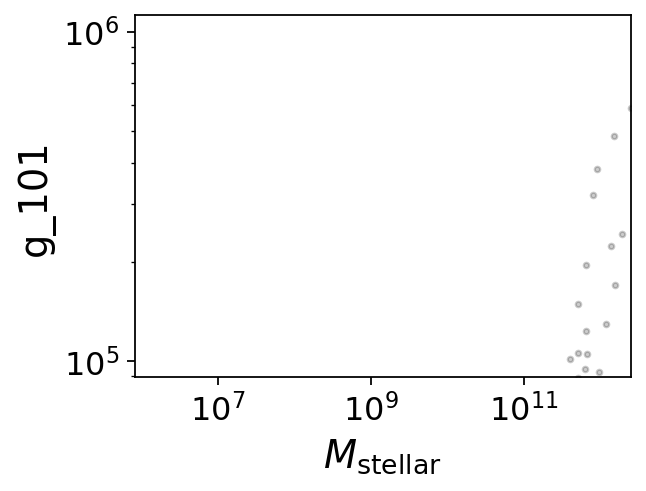

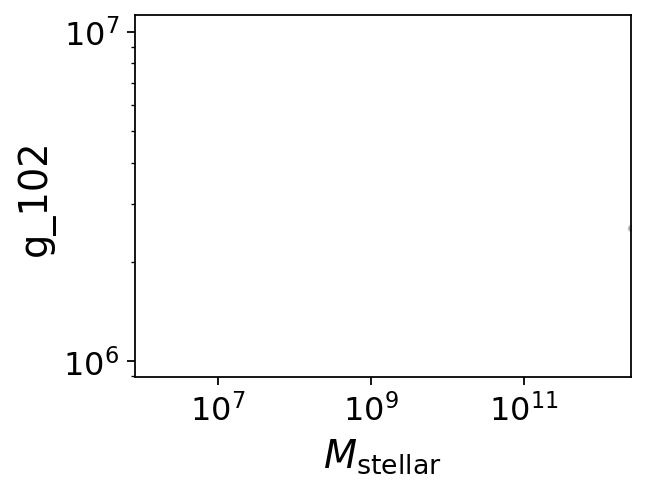

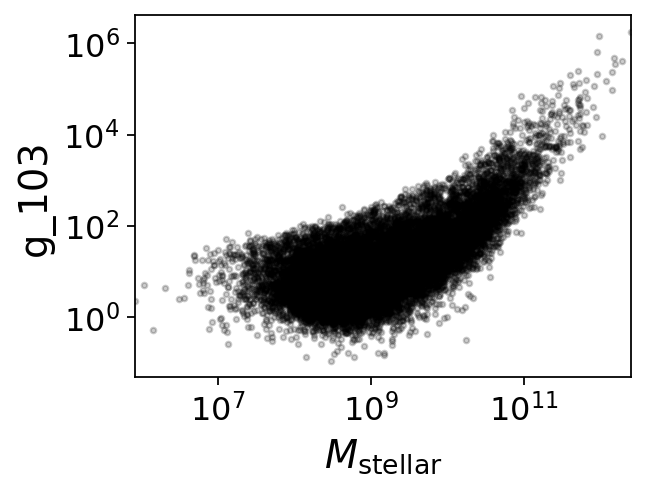

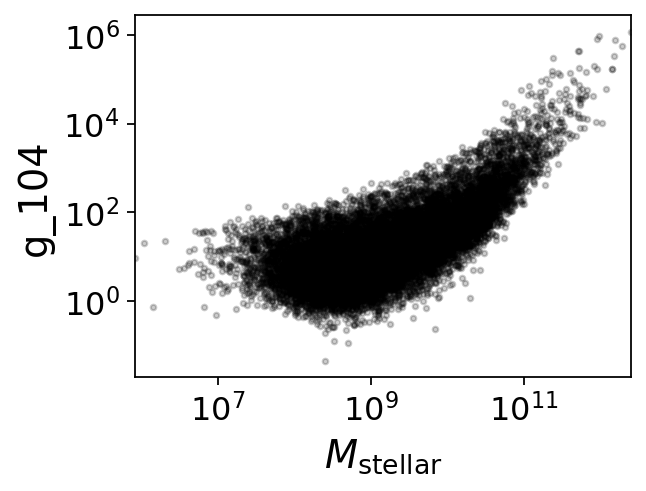

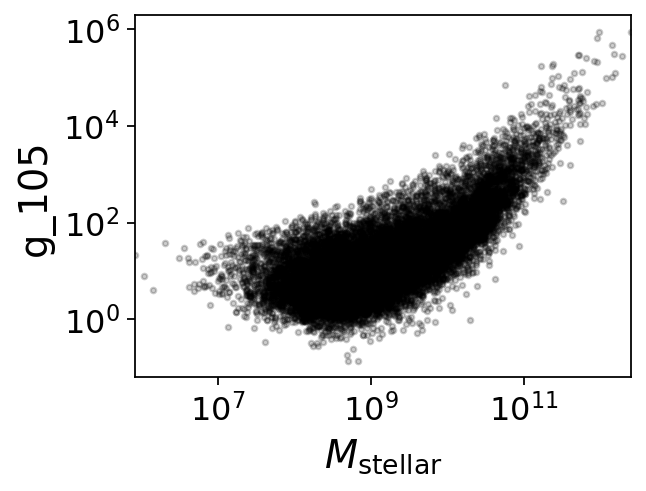

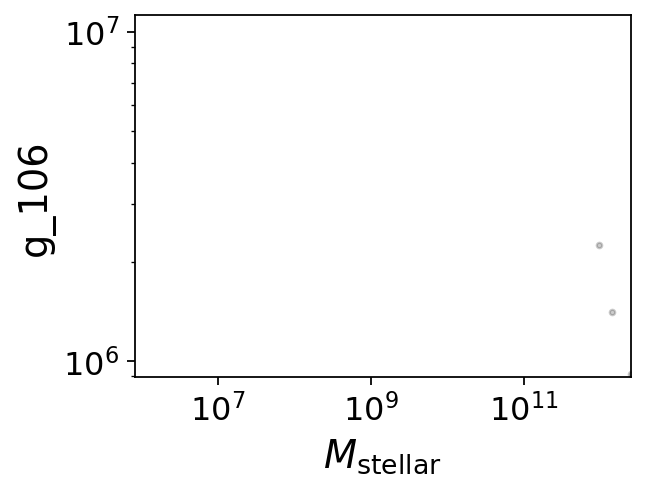

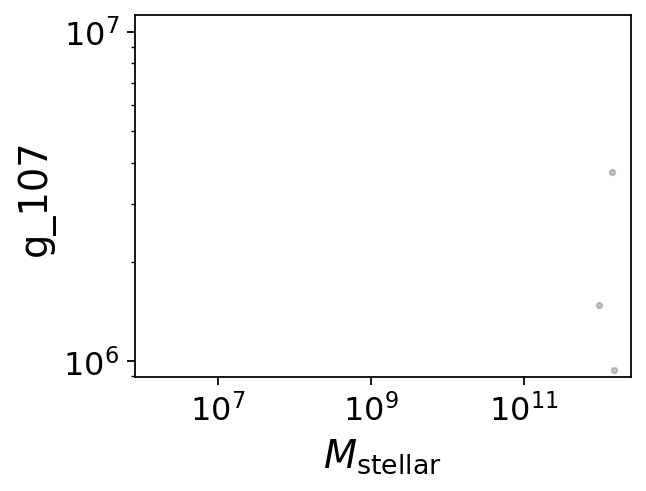

In [23]:
i_feats = np.arange(8) + 8*3
for i_feat in i_feats:
    plot_geometric_feature_vs_mass(m_stellar*mass_multiplier, geo_featurizer, i_feat=i_feat, 
                         x_label=r'$M_\mathrm{stellar}$', log_y=False)

## Make scalar features!

In [12]:
m_order_max = 2
n_groups_rebin = np.atleast_2d(np.arange(8))
print(n_groups_rebin)
eigenvalues_not_trace = False

[[0 1 2 3 4 5 6 7]]


In [13]:
scalar_featurizer = ScalarFeaturizer(geo_featurizer.geo_feature_arr)
scalar_featurizer.compute_MXV_from_features()

Text(0, 0.5, 'M_tot from features')

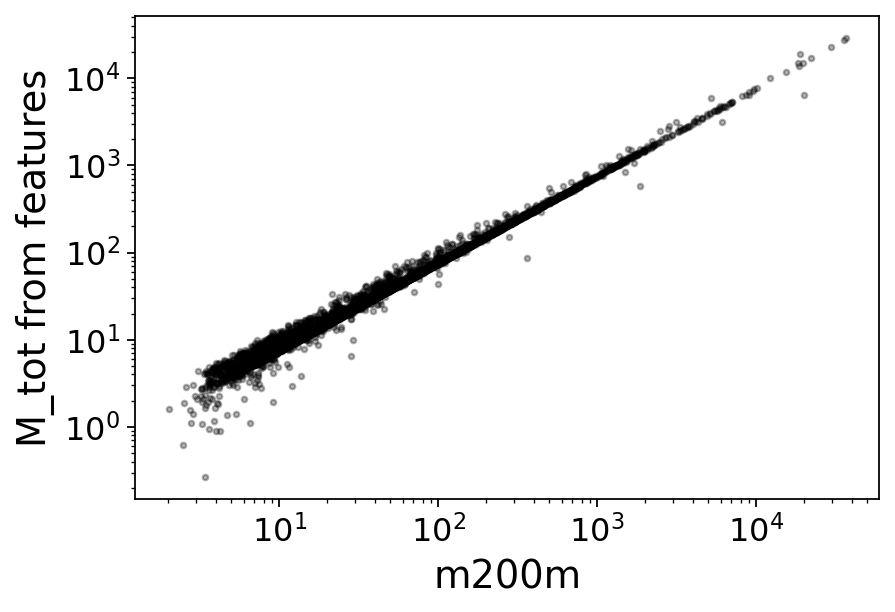

In [14]:
sim_reader.add_catalog_property_to_halos('m200m')
m_200 = np.array([dark_halo.catalog_properties['m200m'] for dark_halo in sim_reader.dark_halo_arr])
plt.scatter(m_200, scalar_featurizer.M_tot, s=6, c='k', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('m200m')
plt.ylabel('M_tot from features')

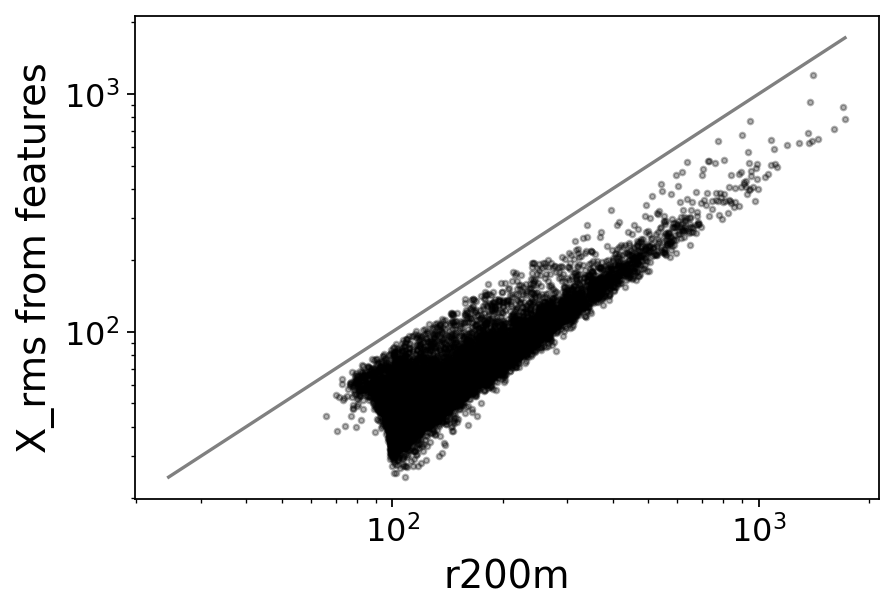

In [15]:
sim_reader.add_catalog_property_to_halos('r200m')
r_200 = np.array([dark_halo.catalog_properties['r200m'] for dark_halo in sim_reader.dark_halo_arr])
plt.scatter(r_200, scalar_featurizer.X_rms, s=6, c='k', alpha=0.3)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('r200m')
plt.ylabel('X_rms from features')
minmin = min(np.min(r_200), np.min(scalar_featurizer.X_rms))
maxmax = max(np.max(r_200), np.max(scalar_featurizer.X_rms))
one2one_line = np.linspace(minmin, maxmax, 2)
plt.plot(one2one_line, one2one_line, color='grey')

In [16]:
scalar_featurizer.rescale_geometric_features(scalar_featurizer.M_tot, 
                                             scalar_featurizer.X_rms, 
                                             scalar_featurizer.V_rms)

In [17]:
scalar_featurizer.featurize(m_order_max, n_groups_rebin=n_groups_rebin,
                            eigenvalues_not_trace=eigenvalues_not_trace)
print(scalar_featurizer.n_features)

Rebinning
Rebinned to 1 bins!
23


<ipython-input-8-63566e65622c>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(4,3))


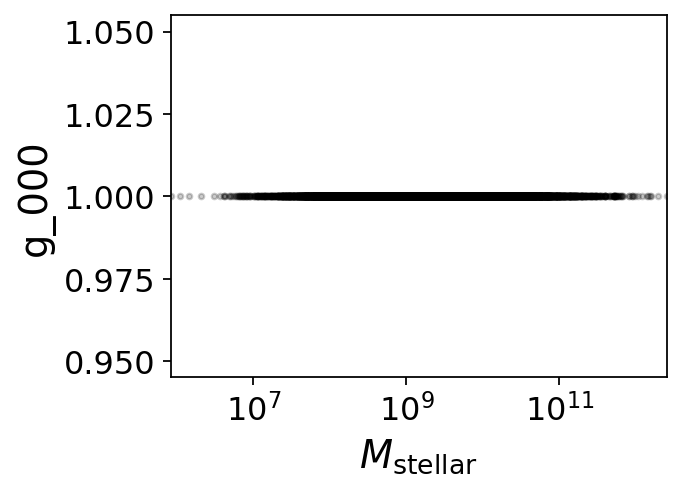

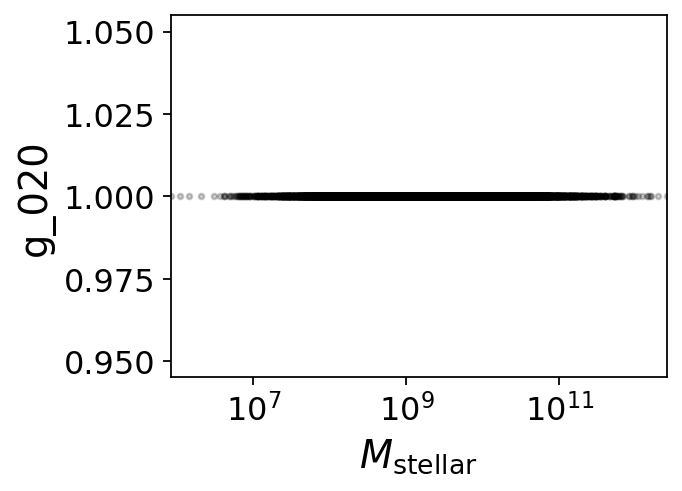

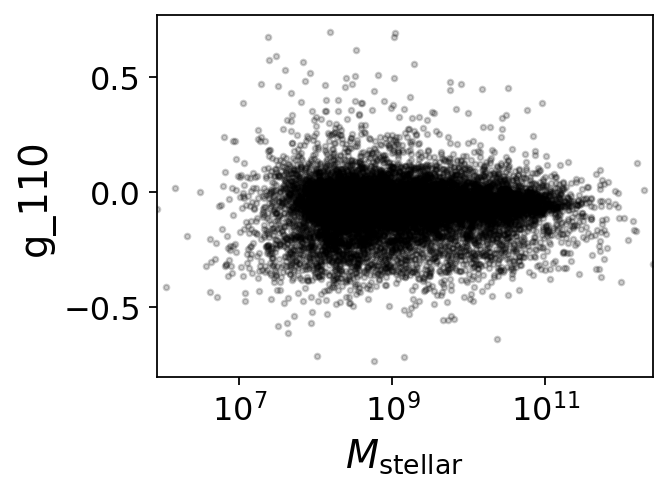

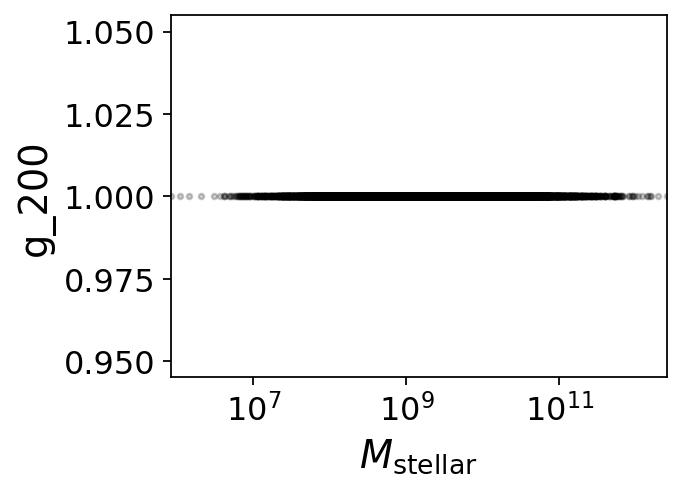

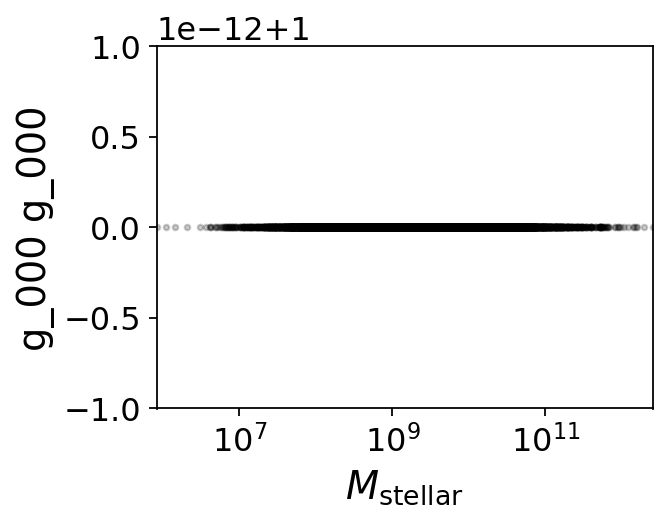

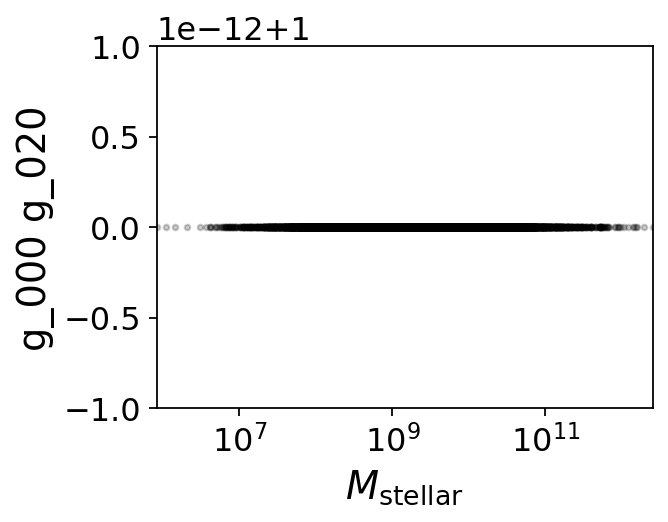

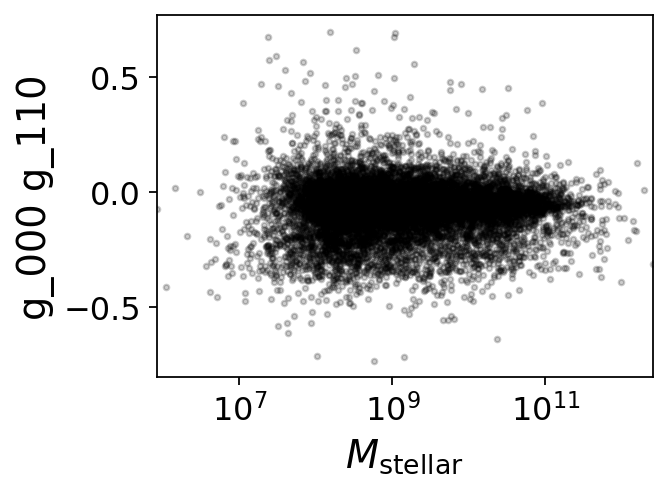

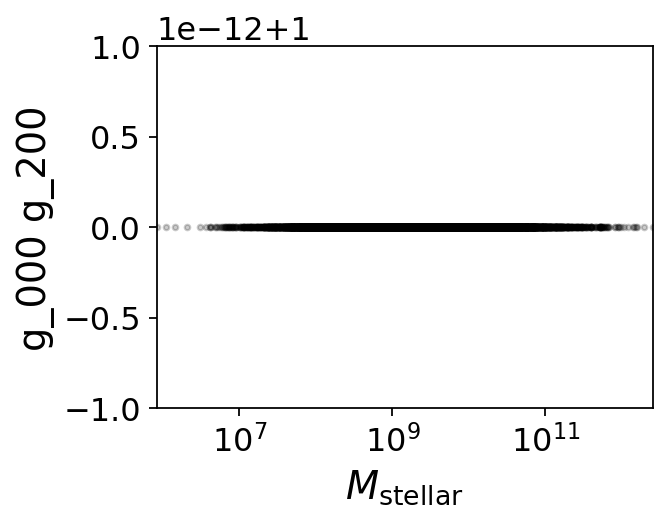

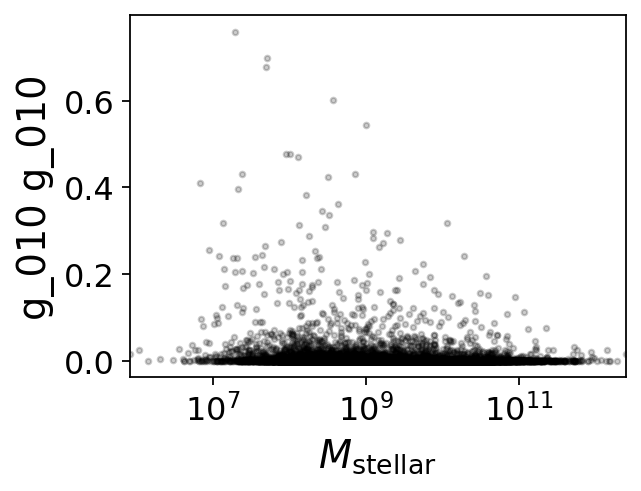

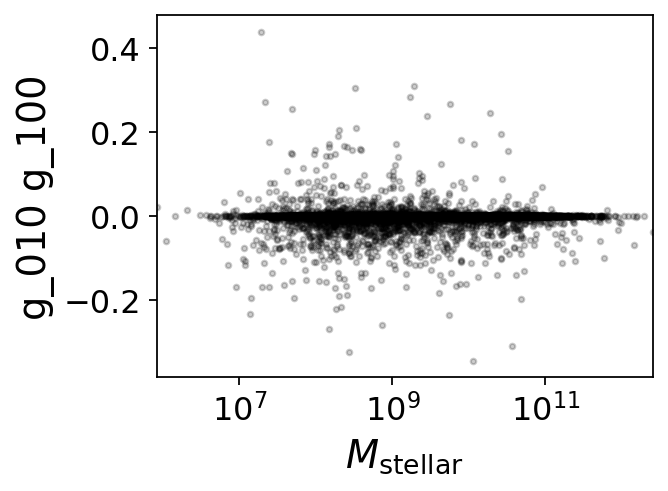

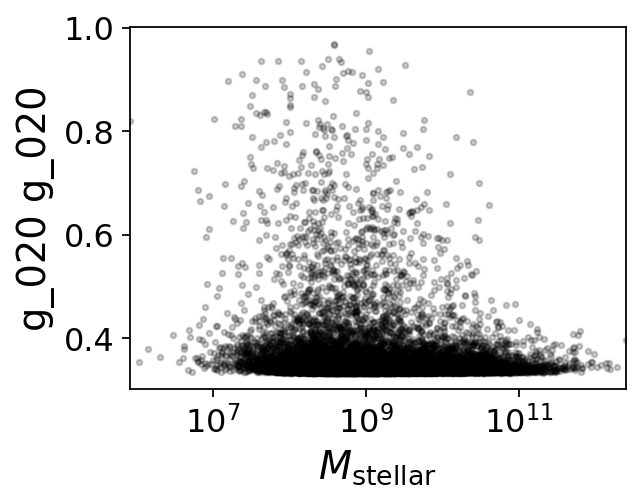

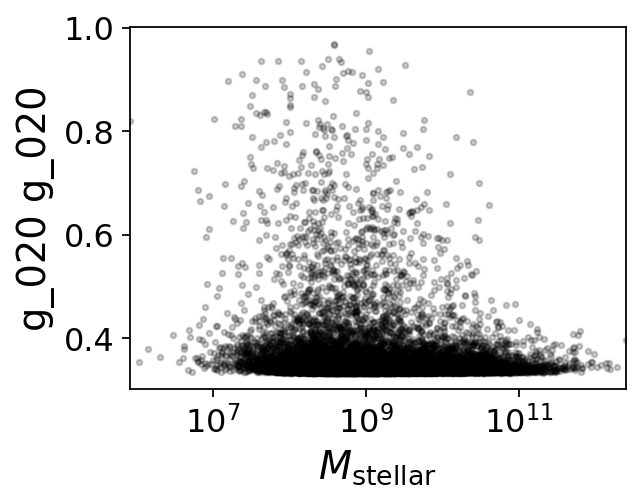

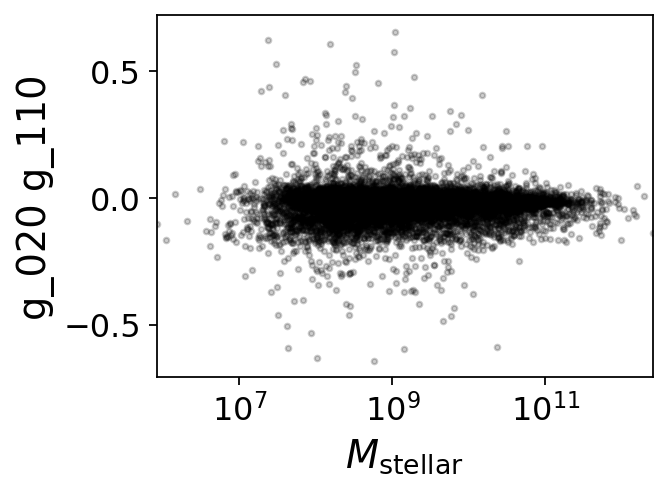

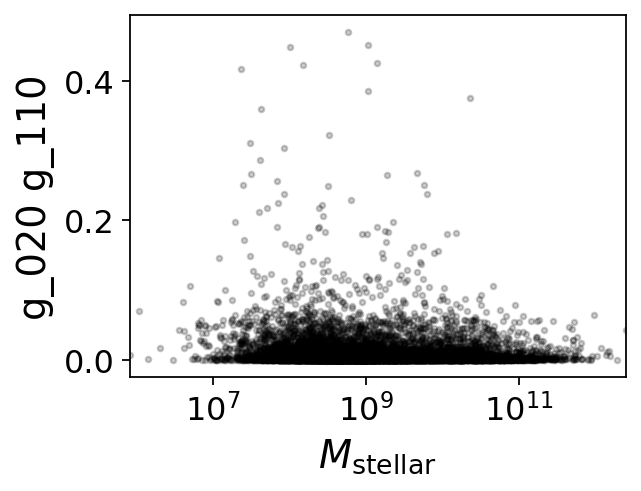

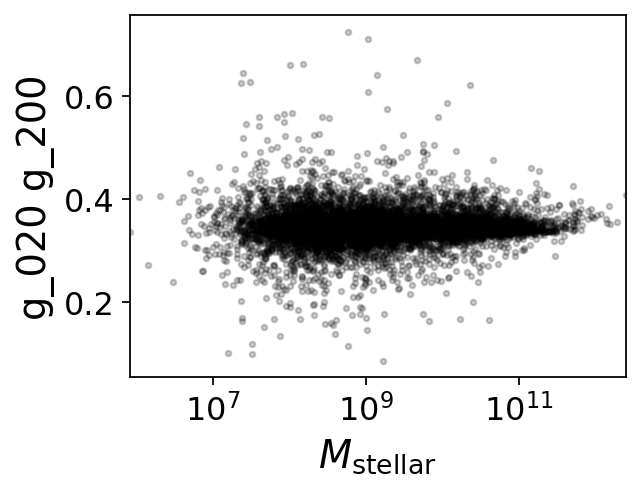

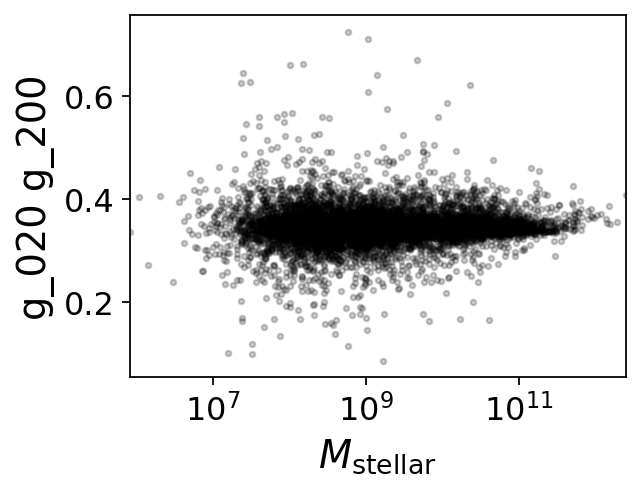

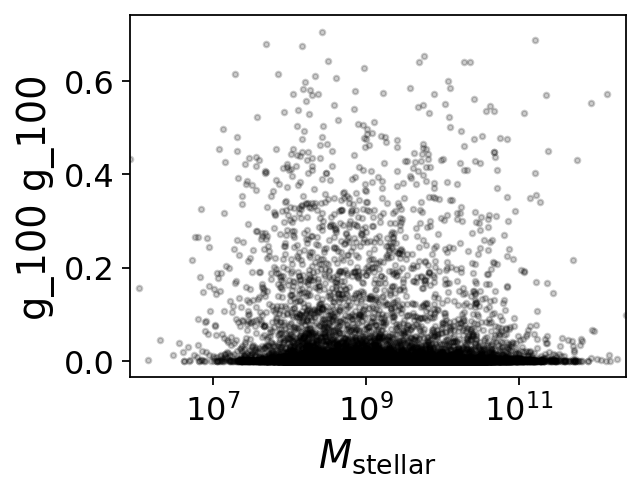

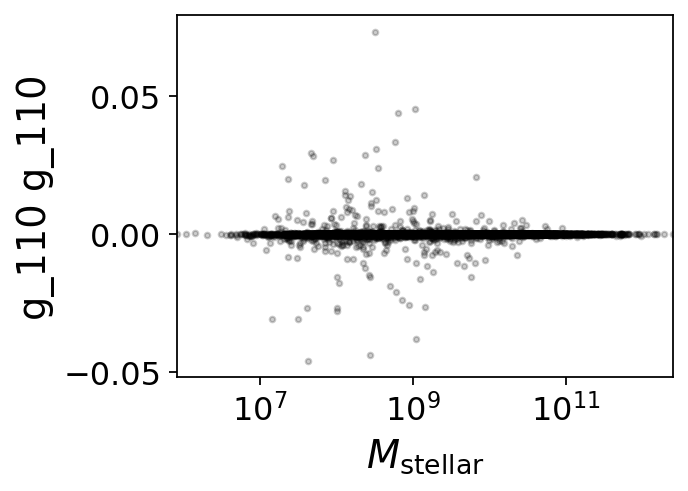

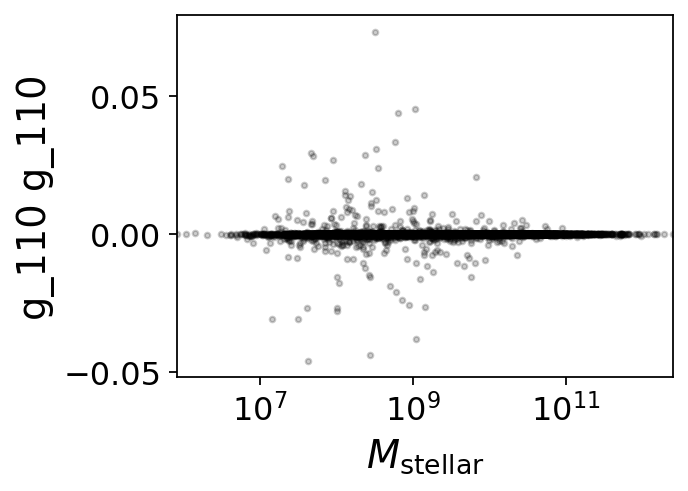

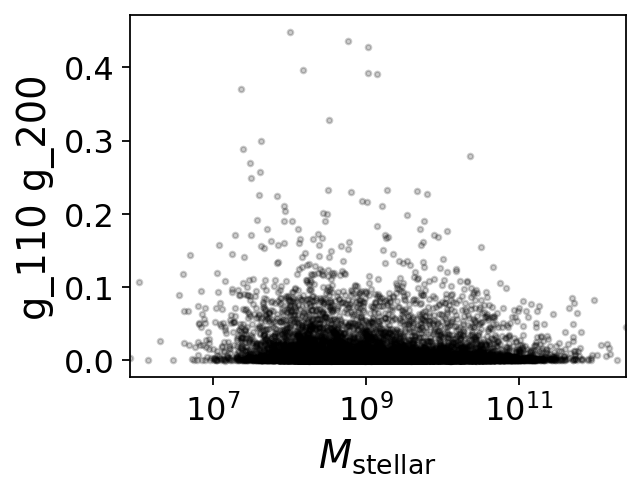

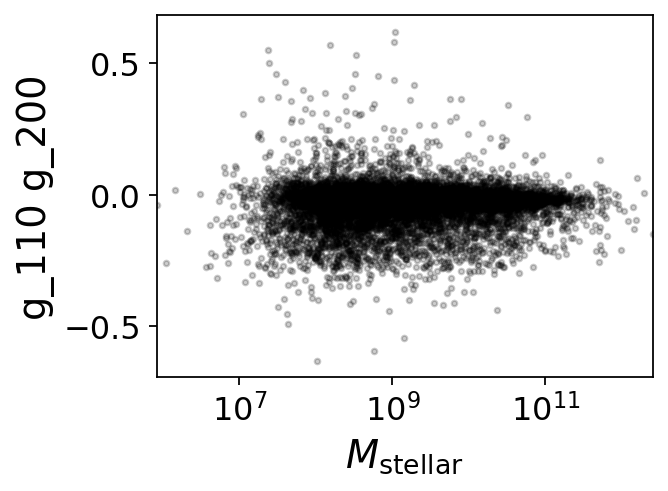

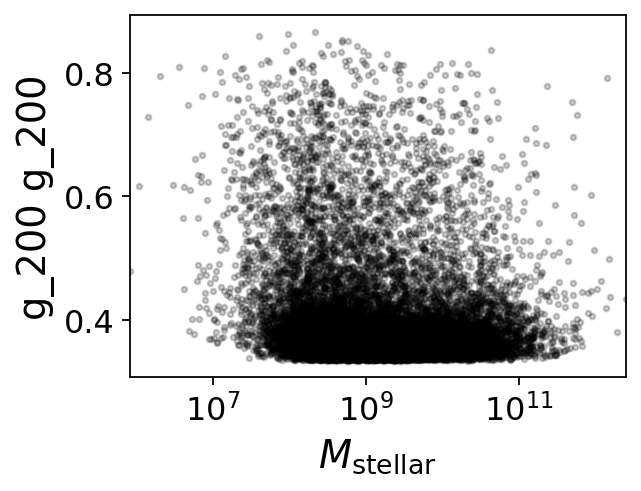

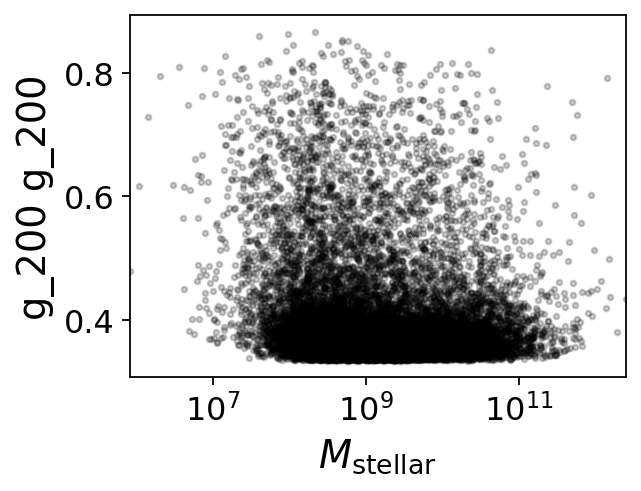

In [18]:
i_feats = np.arange(23)
for i_feat in i_feats:
    plot_scalar_feature_vs_mass(m_stellar*mass_multiplier, scalar_featurizer, i_feat=i_feat, 
                         x_label=r'$M_\mathrm{stellar}$', log_y=False)

## Investigate bins

In [19]:
mass_n_terms = np.empty((len(geo_featurizer.geo_feature_arr), 8))
for i_halo, geo_features in enumerate(geo_featurizer.geo_feature_arr):
    for g in geo_features:
        if g.x_order==0 and g.v_order==0:
            mass_n_terms[i_halo][g.n] = g.value

Text(0, 0.5, 'mean value over all halos')

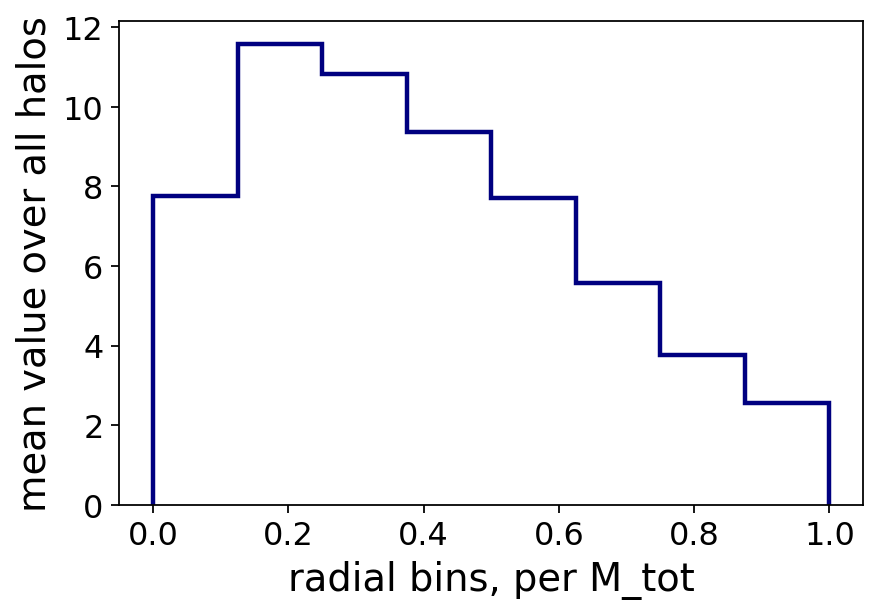

In [20]:
# draws a histogram with values equal to pre-computed histogram 
#(see weights, https://matplotlib.org/3.5.1/api/_as_gen/matplotlib.pyplot.hist.html)
r_edges = np.linspace(0, 1, 9)
mass_avg = np.mean(mass_n_terms, axis=0)
plt.hist(r_edges[:-1], r_edges, weights=mass_avg, histtype='step', lw=2, color='navy')
plt.xlabel('radial bins, per M_tot')
plt.ylabel('mean value over all halos')

In [21]:
n_groups_bin = [[0,1,2], [3,4,5,6,7]]
print(np.sum(mass_avg[n_groups_bin[0]]), np.sum(mass_avg[n_groups_bin[1]]))
n_groups_bin = [[0,1], [2,3,4,5,6,7]]
print(np.sum(mass_avg[n_groups_bin[0]]), np.sum(mass_avg[n_groups_bin[1]]))

30.160736138912963 28.980357128174752
19.335778621266993 39.805314645820715


Conclusion: Summing over first 3 bins and last 5 is closest to half the mass, at 57% & 43%.